# Big Data Mart Sales Problem (Practice Project - 7)

In [1]:
# Let's import Necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Let's import dataset

train = pd.read_csv("bigdatamart_Train.csv")
test = pd.read_csv("bigdatamart_Test.csv")
train["Source"] = "Train"
test["Source"] = "Test"
data = pd.concat([train,test], ignore_index=True)

data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Train
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Train
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Train
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Train
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,Train
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,Train
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,Train
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,Train
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,Train


In [3]:
# Shape of the dataset

data.shape

(14204, 13)

In [4]:
# Quick information about dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [5]:
# Let's check null values

data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
dtype: int64

In [6]:
# Let's observe the correlation matrix

data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.015901,0.036236,0.000645,0.014123
Item_Visibility,-0.015901,1.000000,-0.006351,-0.083678,-0.128625
Item_MRP,0.036236,-0.006351,1.000000,0.000141,0.567574
Outlet_Establishment_Year,0.000645,-0.083678,0.000141,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


All the variables have very less correlation, only Item_Outlet_Sales & Item_MRP have significant correlation 0.567

In [7]:
# Let's check the value counts

for col in data.columns:
    if data[col].dtype == 'object':
        print(data[col].value_counts())
        print()
        
# in the below output Item_Fat_Content have basically two types of fats, low fat and regulare, let's deal with it..

FDT60    10
FDL13    10
FDD08    10
FDT15    10
FDU45    10
         ..
FDS22     7
FDM50     7
FDI46     7
NCL42     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

OUT027    1559
OUT013    1553
OUT049    1550
OUT035    1550
OUT046    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64


In [8]:
# Replacing low fat & LF with Low Fat
# Replacing reg with Regular

data["Item_Fat_Content"].replace("low fat", "Low Fat", inplace=True)
data["Item_Fat_Content"].replace("LF", "Low Fat", inplace=True)
data["Item_Fat_Content"].replace("reg", "Regular", inplace=True)

In [9]:
# Let's check the value count of Item_Fat_Content again

data["Item_Fat_Content"].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [10]:
# Let's fillna with its mean()

data["Item_Weight"] = data["Item_Weight"].fillna(data["Item_Weight"].mean())

In [11]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
dtype: int64

In [12]:
# Check value counts for dealing with null values

data["Outlet_Size"].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [13]:
# Checking the mode value of the Outlet_Size

data["Outlet_Size"].describe()

count      10188
unique         3
top       Medium
freq        4655
Name: Outlet_Size, dtype: object

In [14]:
# Let's fillna with its mode()

data["Outlet_Size"] = data["Outlet_Size"].fillna("Medium")

In [15]:
# Let's check the null values again if any..

data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
dtype: int64

All null values has been filled. Item_Outlet_Sales is our target column.

In [16]:
# Let's describe the dataset

data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.234226,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027036,94.012000,1987.000000,834.247400
50%,12.792854,0.054021,142.247000,1999.000000,1794.331000
75%,16.000000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [17]:
# Check the skewneww

data.skew()

Item_Weight                  0.111314
Item_Visibility              1.195175
Item_MRP                     0.130728
Outlet_Establishment_Year   -0.396465
Item_Outlet_Sales            1.177531
dtype: float64

Item_Visibility has skewness. Let's deal with it...

In [18]:
# Removing Skewness

for index in data.skew().index:
    if data.skew().loc[index]>0.5:
        data[index] = np.sqrt(data[index])

data.skew()

Item_Weight                  0.111314
Item_Visibility             -0.096758
Item_MRP                     0.130728
Outlet_Establishment_Year   -0.396465
Item_Outlet_Sales            0.234676
dtype: float64

It seems that skewness has gone...

In [19]:
# Checking the data types

data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Source                        object
dtype: object

In [20]:
# Analysing dataset again

data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,FDA15,9.300000,Low Fat,0.126678,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,61.115775,Train
1,DRC01,5.920000,Regular,0.138846,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,21.057607,Train
2,FDN15,17.500000,Low Fat,0.129461,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,45.795961,Train
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,27.062520,Train
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,31.538947,Train
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,23.592558,Train
6,FDO10,13.650000,Regular,0.112876,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,18.535177,Train
7,FDP10,12.792854,Low Fat,0.357029,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,63.425260,Train
8,FDH17,16.200000,Regular,0.129179,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,32.811562,Train
9,FDU28,19.200000,Regular,0.307327,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,68.633337,Train


In [21]:
# Let's drop the two features which is not useful

data.drop(columns = ["Item_Identifier", "Outlet_Identifier"], axis =1, inplace=True)

In [22]:
# Convert Categorical columns to numeric columns
# Let's use OneHotEncoding

cate_to_conv = ["Item_Fat_Content","Item_Type","Outlet_Size","Outlet_Location_Type","Outlet_Type"]
data = pd.get_dummies(data,columns=cate_to_conv)
data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Source,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.126678,249.8092,1999,61.115775,Train,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.138846,48.2692,2009,21.057607,Train,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.129461,141.6180,1999,45.795961,Train,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,27.062520,Train,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,31.538947,Train,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50,0.116174,141.3154,1997,NaN,Test,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
14200,7.60,0.378141,169.1448,2009,NaN,Test,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
14201,10.00,0.271162,118.7440,2002,NaN,Test,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
14202,15.30,0.000000,214.6218,2007,NaN,Test,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [23]:
# Now the data is looks good.
# Let's separate the train and test data

df_train = data.loc[data["Source"] == "Train"]
df_test = data.loc[data["Source"] == "Test"]

In [24]:
df_train.columns
df_test.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Source',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [25]:
# Reset index of test data

df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

print("Shape of Test Data : ",df_train.shape)

Shape of Test Data :  (8523, 34)


In [26]:
# let's drop the Item_Outlet_Sales from test dataset as that is the output variable to be predict

df_test.drop("Item_Outlet_Sales", axis=1, inplace = True)

In [27]:
# Let's drop the Source column

df_train.drop("Source", axis=1, inplace = True)
df_test.drop("Source", axis=1, inplace = True)

In [28]:
# Final Dataset for model building

df_train

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.126678,249.8092,1999,61.115775,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.920,0.138846,48.2692,2009,21.057607,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.500,0.129461,141.6180,1999,45.795961,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,1998,27.062520,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.930,0.000000,53.8614,1987,31.538947,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.238293,214.5218,1987,52.710373,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
8519,8.380,0.216754,108.1570,2002,23.436830,0,1,1,0,0,...,0,1,0,0,1,0,0,1,0,0
8520,10.600,0.187580,85.1224,2004,34.541477,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8521,7.210,0.381078,103.1332,2009,42.960419,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [29]:
# Let's import the required necessary libraries for model building

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

In [30]:
# Let's separate the input and output variables for scaling

x = df_train.drop("Item_Outlet_Sales", axis=1)
y = df_train["Item_Outlet_Sales"]

In [31]:
# Let's do Scaling

scale = StandardScaler()
df_x = scale.fit_transform(x)
df_x

array([[-0.83922588, -0.99754751,  1.74745381, ...,  0.72680189,
        -0.34955064, -0.35102831],
       [-1.63904672, -0.88413915, -1.48902325, ..., -1.37589075,
         2.86081583, -0.35102831],
       [ 1.10116786, -0.97161169,  0.01004021, ...,  0.72680189,
        -0.34955064, -0.35102831],
       ...,
       [-0.53160248, -0.42993038, -0.89720755, ...,  0.72680189,
        -0.34955064, -0.35102831],
       [-1.33378966,  1.37350358, -0.60797692, ..., -1.37589075,
         2.86081583, -0.35102831],
       [ 0.46225773, -0.20377765, -1.05226104, ...,  0.72680189,
        -0.34955064, -0.35102831]])

Number of components explaining 95% variance :  23


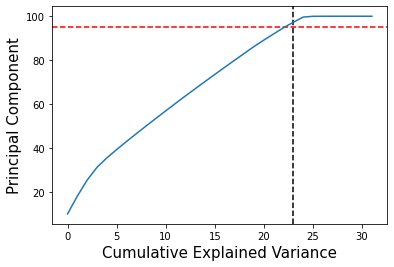

In [32]:
# There are so many columns. So, Let's use the PCA

from sklearn.decomposition import PCA
from sklearn.metrics import explained_variance_score

test_pca = PCA()
test_pca.fit(df_x)

var_cumu = np.cumsum(test_pca.explained_variance_ratio_)*100

k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance : ",k)


plt.xlabel("Cumulative Explained Variance",fontsize = 15)
plt.ylabel("Principal Component", fontsize = 15)
plt.axvline(x=k, color = 'k',linestyle = '--')
plt.axhline(y=95, color = 'r', linestyle = '--')
plt.plot(var_cumu)
plt.show()

In [33]:
# finalizing the features with PCA for model building

pca = PCA(n_components = 23)
xx = pca.fit_transform(df_x)
xx

array([[-0.79477153, -0.09715113, -0.85648434, ...,  0.90263728,
        -1.34076982, -1.13044173],
       [ 2.23433191, -2.05238215,  1.32984683, ..., -0.20241961,
        -0.09463821,  0.84127228],
       [-0.69883755, -0.07850916, -0.46313746, ..., -0.89596642,
        -0.15532954, -1.91497362],
       ...,
       [-2.28156579, -0.43315268, -1.74708938, ...,  0.95021529,
         0.08013872,  1.49990045],
       [ 2.306118  , -1.79450032,  2.08615562, ..., -0.24383438,
        -1.23348088,  0.62512078],
       [-2.0265023 ,  1.5399107 , -1.39995166, ..., -0.8475394 ,
         1.12627102, -0.24593765]])

In [34]:
# Let's find the best random state

def model(regr):
    max_r2 = 0
    max_state = 0
    for i in range(1,201):
        x_train,x_test,y_train,y_test = train_test_split(xx, y, test_size = 0.20, random_state = i)
        regr.fit(x_train, y_train)
        y_pred = regr.predict(x_test)
        r2_Score = r2_score(y_test, y_pred)
        if r2_Score>max_r2:
            max_r2 = r2_Score
            max_state = i
    print("Best R2_Score corresponding to ",max_state, "is ",max_r2)

In [36]:
# Linear Regression Model

from sklearn.linear_model import LinearRegression

LR = LinearRegression()
model(LR)

Best R2_Score corresponding to  76 is  0.6044649012435672


In [37]:
# Model Format

def models(mod):
    x_train, x_test, y_train, y_test = train_test_split(xx, y, test_size=0.20, random_state = 76)
    mod.fit(x_train, y_train)
    y_preds = mod.predict(x_test)
    r2_scor = r2_score(y_test, y_preds)
    print("Best R2_Score is : ",r2_scor)
     
def cross(mod):
    cross_score = cross_val_score(mod, xx, y, cv=5, scoring='r2')
    print("Cross Validation Score is : ",cross_score.mean())  

In [38]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()
models(RFR)
cross(RFR)

Best R2_Score is :  0.6565301103208743
Cross Validation Score is :  0.6201464037013255


In [39]:
# Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()
models(GBR)
cross(GBR)

Best R2_Score is :  0.6793729976377763
Cross Validation Score is :  0.6506646148874581


In [40]:
# Decision Tree Regresssor

from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor()
models(DTR)
cross(DTR)

Best R2_Score is :  0.32205019730738127
Cross Validation Score is :  0.2568779456207536


#### It seems that Gradient Boosting Regressor is giving me the best score and very less difference after cross validation. So, now I am going to use Hyperparameter Tuning with the Gradient Boosting Regressor.

In [51]:
# Hyper Parameter Tuning with Gradient Boosting Regressor

from sklearn.model_selection import GridSearchCV

param_grid = {"min_samples_leaf" : [1,2], "min_samples_split": [2,3,4],
             "n_estimators" : [100], "criterion" : ["friedman_mse"]}

grid_search = GridSearchCV(GBR, param_grid = param_grid)

### Final Model (Gradient Boosting Regressor)

In [52]:
Final_Model = GradientBoostingRegressor(min_samples_leaf =2 , min_samples_split=4 ,n_estimators=100,criterion = 'friedman_mse',)
models(Final_Model)

Best R2_Score is :  0.6785430043070864


In [53]:
# Now Let's transform df_test data according to pca for sales prediciton

df_test_pca = pca.transform(df_test)
sales_pred = Final_Model.predict(df_test_pca)

# Let's make the Data Frame for Price Prediction

predict_sales = pd.DataFrame(sales_pred, columns = ["Item_Outlet_Sales"])

# Let's save the submission to csv file

predict_sales.to_csv("Item_Outlet_Sales_Predictions.csv", index=False)

### Saving the Final Model

In [54]:
# Saving final model

import joblib
joblib.dump(Final_Model,"Final_Model_Sales_Predictions.pkl")

['Final_Model_Sales_Predictions.pkl']